In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('etc/results/661_test_30_pca/result_report.json') as json_file:
    pca_data = json.load(json_file)
    json_file.close()
pca_models_name = [model['model'] for model in pca_data]
results_pca = []
predictions_pca = []

with open('etc/results/661_test_30_all/result_report.json') as json_file:
    data = json.load(json_file)
    json_file.close()
models_name = [model['model'] for model in data]
results = []
predictions = []
print(len(pca_models_name), len(models_name))

6 6


In [3]:
for models in pca_data:
    print(models.keys())
    for test in models['test']:
        test['model'] = models['model']
        results_pca.append(test)
    for prediction in models['predict']:
        predictions_pca.append({'model': models['model'], f'prediction': prediction[0], 'real': prediction[1]})

for models in data:
    print(models.keys())
    for test in models['test']:
        test['model'] = models['model']
        results.append(test)
    for prediction in models['predict']:
        predictions.append({'model': models['model'], f'prediction': prediction[0], 'real': prediction[1]})


dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])
dict_keys(['model', 'test', 'predict'])


In [4]:
pca_results_df = pd.DataFrame(results_pca)
results_df = pd.DataFrame(results)
results_df

,test/MAE,test/MAPE,test/SMAPE,test/WMAPE,test/MSE,test/RMSE,test/MSLE,test/test_loss,model
0,0.979980,2.703187,1.972916,2.703187,1.009637,0.979980,1.597135,1.009637,GRU
1,0.032864,0.218857,0.138971,0.218857,0.004126,0.032864,0.018954,0.004126,LSTM
2,0.034076,0.167636,0.117375,0.167636,0.003292,0.034076,0.020789,0.003292,RNN
3,0.050113,0.298159,0.176799,0.298159,0.006084,0.050113,0.049856,0.006084,TST
4,0.149948,0.634690,0.405366,0.634690,0.030497,0.149948,0.190177,0.030497,Transformer
5,0.094576,1.168141,0.242437,1.168141,0.028663,0.094576,0.113141,0.028663,Linear


In [5]:
pca_results_df

,test/MAE,test/MAPE,test/SMAPE,test/WMAPE,test/MSE,test/RMSE,test/MSLE,test/test_loss,model
0,0.038409,0.201980,0.128410,0.201980,0.003932,0.038409,0.019980,0.003932,LSTM
1,0.032423,0.177252,0.110306,0.177252,0.003382,0.032423,0.019891,0.003382,GRU
2,0.028427,0.165382,0.102322,0.165382,0.002986,0.028427,0.018016,0.002986,RNN
3,0.160305,0.583771,0.441860,0.583771,0.036473,0.160305,0.195157,0.036473,Transformer
4,0.068569,0.531525,0.214967,0.531525,0.010055,0.068569,0.068956,0.010055,TST
5,0.092615,1.217745,0.235290,1.217745,0.030206,0.092615,0.114494,0.030206,Linear


In [6]:
pca_results_log_df = pca_results_df.copy()
results_log_df = results_df.copy()

In [9]:
pca_predictions_df = pd.DataFrame(predictions_pca)
predictions_df = pd.DataFrame(predictions)

In [10]:
complete_predict_df = predictions_df.copy()
gru_prediction = complete_predict_df[complete_predict_df['model'] == 'GRU'].reset_index()
LSTM_prediction = complete_predict_df[complete_predict_df['model'] == 'LSTM'].reset_index()
RNN_prediction = complete_predict_df[complete_predict_df['model'] == 'RNN'].reset_index()
TST_prediction = complete_predict_df[complete_predict_df['model'] == 'TST'].reset_index()
Transformer_prediction = complete_predict_df[complete_predict_df['model'] == 'Transformer'].reset_index()
Linear_prediction = complete_predict_df[complete_predict_df['model'] == 'Linear'].reset_index()

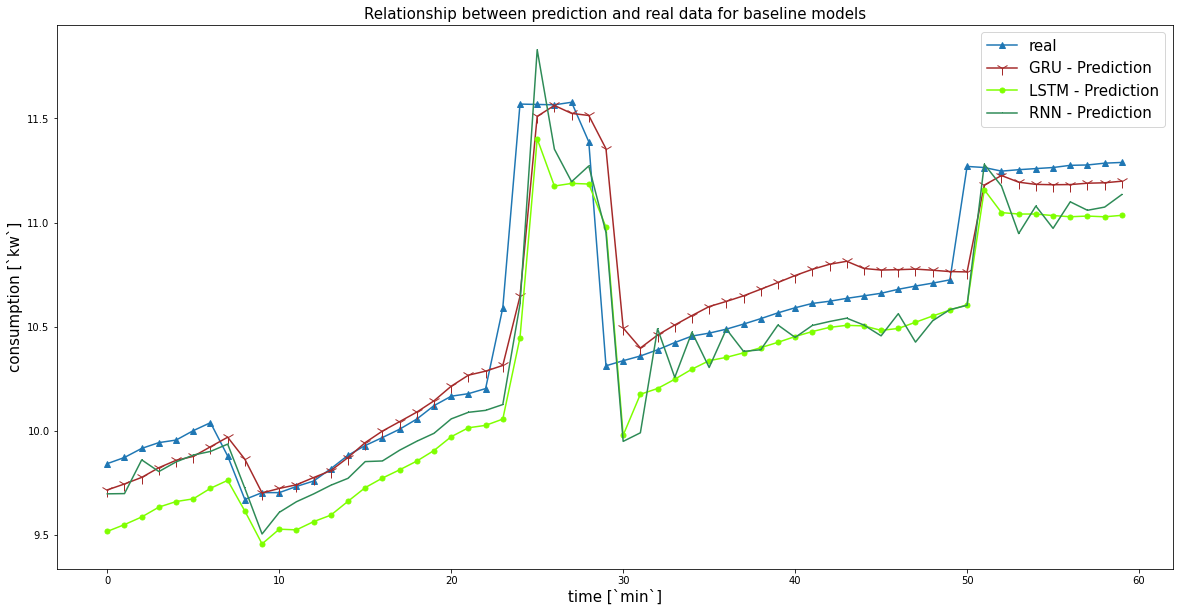

In [11]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between prediction and real data for baseline models', fontsize=15)
plt.plot(gru_prediction['real'].head(60), '^', ls='-',label='real')
plt.plot(gru_prediction['prediction'].head(60), '1', ms = 13, ls = '-', c = '#A52A2A',label='GRU - Prediction')
plt.plot(LSTM_prediction['prediction'].head(60), '.', ms = 10, ls = '-', c = '#7FFF00',label='LSTM - Prediction')
plt.plot(RNN_prediction['prediction'].head(60), ',', ms = 13, ls = '-', c = '#2E8B57', label='RNN - Prediction')
plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
# plt.savefig(f'methodology/imgs/results/forecasting/baseline_models_forecasting.eps', dpi=600, bbox_inches='tight')
# plt.savefig(f'methodology/imgs/results/forecasting/baseline_models_forecasting.svg', dpi=600, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


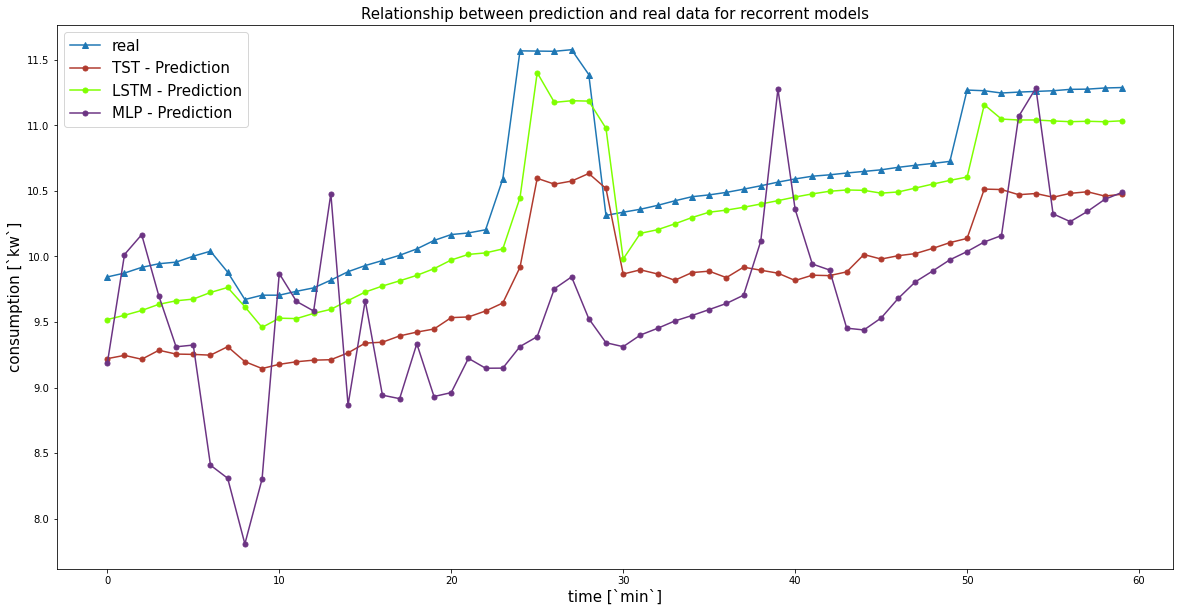

In [20]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between prediction and real data for recorrent models', fontsize=15)
plt.plot(gru_prediction['real'].head(60), '^', ls='-',label='real')
plt.plot(TST_prediction['prediction'].head(60), '.', ms = 10, ls = '-', c = '#B03A2E',label='TST - Prediction')
plt.plot(LSTM_prediction['prediction'].head(60), '.', ms = 10, ls = '-', c = '#7FFF00',label='LSTM - Prediction')
plt.plot(Linear_prediction['prediction'].head(60), '.', ms = 10, ls = '-', c = '#6C3483',label='MLP - Prediction')



# plt.plot(output, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.eps', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.svg', dpi=600, bbox_inches='tight')
plt.show()